In [2]:
import wellmap
import pandas as pd
import os
import string
import seaborn as sns

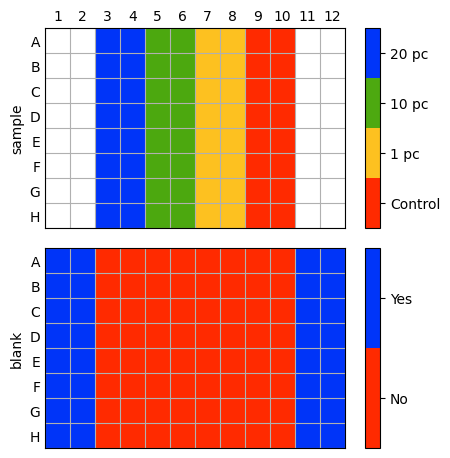

In [4]:
# wellmap.show("2 substance 1 plate.toml")
wellmap.show("sph_DMSO_dif_conc.toml"); # Yes, this semicolon is meaningful. Or plates map will be duplicated

In [7]:
path_to_data_0h = r"C:\Users\Modern\Documents\Biorad\CellProfiler\Results\27-06-2024 Resazurin hTERT Sph dif N\0H_Wells_plate.csv"
path_to_data_24h = r"C:\Users\Modern\Documents\Biorad\CellProfiler\Results\27-06-2024 Resazurin hTERT Sph dif N\24HWells_plate.csv"

data_raw_0h = pd.read_csv(path_to_data_0h) 
data_raw_24h = pd.read_csv(path_to_data_24h) 

# print(data_raw.columns)
# print(data)


In [16]:
data_0H = data_raw_0h[['Intensity_MeanIntensity_OrigGreen','Intensity_MeanIntensity_OrigRed']].copy()
data_24H = data_raw_24h[['Intensity_MeanIntensity_OrigGreen','Intensity_MeanIntensity_OrigRed']].copy()

data_0H['Time'] = '0_h'
data_24H['Time'] = '24_h'


In [17]:
row_column_df = pd.DataFrame(columns=['row','col'])

row =  list(string.ascii_uppercase[0:8])
column = list(range(1,13))

row_column_list = []

for c in column:
    for r in row:
        array_i = [r,c]
        row_column_list.append(array_i)


# print(row_column_list)


row_column_df = pd.DataFrame(row_column_list, columns = ['row', 'col']) 

print(row_column_df)

   row  col
0    A    1
1    B    1
2    C    1
3    D    1
4    E    1
..  ..  ...
91   D   12
92   E   12
93   F   12
94   G   12
95   H   12

[96 rows x 2 columns]


In [18]:

data_indexed_0H = pd.concat([row_column_df, data_0H], axis=1, join='inner')
data_indexed_24H = pd.concat([row_column_df, data_24H], axis=1, join='inner')



data_indexed_0H['col']=data_indexed_0H['col'].astype(str)
data_indexed_24H['col']=data_indexed_24H['col'].astype(str)


In [22]:

data = pd.concat([data_indexed_0H, data_indexed_24H], axis=0, join='inner')

print(data)

   row col  Intensity_MeanIntensity_OrigGreen  \
0    A   1                           0.010676   
1    B   1                           0.012040   
2    C   1                           0.012846   
3    D   1                           0.012140   
4    E   1                           0.012437   
..  ..  ..                                ...   
91   D  12                           0.031638   
92   E  12                           0.030534   
93   F  12                           0.031788   
94   G  12                           0.031281   
95   H  12                           0.027520   

    Intensity_MeanIntensity_OrigRed  Time  
0                          0.214120   0_h  
1                          0.249373   0_h  
2                          0.267578   0_h  
3                          0.250668   0_h  
4                          0.259089   0_h  
..                              ...   ...  
91                         0.295843  24_h  
92                         0.301680  24_h  
93             

In [23]:
labels = wellmap.load('sph_dif_number.toml')
# print(labels.dtypes)
# print(data_indexed.dtypes)


data_plate = pd.merge(data, labels)
print(data_plate)

    row col  Intensity_MeanIntensity_OrigGreen  \
0     A   1                           0.010676   
1     A   1                           0.188508   
2     B   1                           0.012040   
3     B   1                           0.204944   
4     C   1                           0.012846   
..   ..  ..                                ...   
187   F  12                           0.031788   
188   G  12                           0.020373   
189   G  12                           0.031281   
190   H  12                           0.017356   
191   H  12                           0.027520   

     Intensity_MeanIntensity_OrigRed  Time well well0  row_i  col_j sample  
0                           0.214120   0_h   A1   A01      0      0    N57  
1                           0.056009  24_h   A1   A01      0      0    N57  
2                           0.249373   0_h   B1   B01      1      0    N57  
3                           0.068858  24_h   B1   B01      1      0    N57  
4             

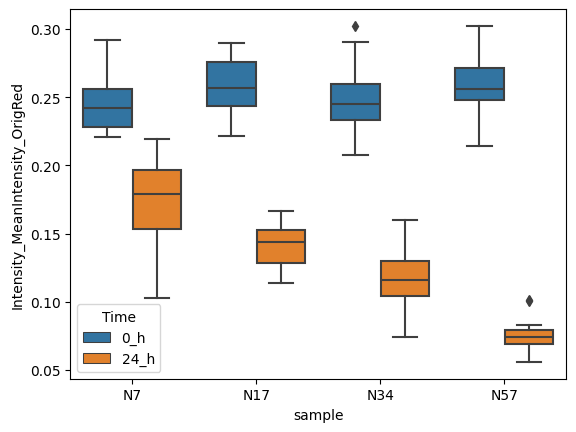

In [31]:
ax = sns.boxplot(data=data_plate, x="sample", y="Intensity_MeanIntensity_OrigRed", hue = 'Time', order=['N7', 'N17', 'N34', 'N57'])
